<img style="float: left;" src="./images/PalleAI-Banner1.png" width="800">

# Build an Image Classifier Model CIFAR Dataset

### Xception Architecture: Deep Learning with Depthwise Separable Convolutions (Francois Chollet 2017)

### Mini-Xception Like Architecture with
* **Residual Connections**

* **Batch Normalization Layers**

* **Separable Conv2D Layers**

<img style="float: left;" src="./images/cifar3.png" width="1000">

In [1]:
labels_dict = {0:"Airplane", 1:"Automobile", 2:"Bird", 3:"Cat", 4:"Deer", 5:"Dog",
               6: "Frog", 7:"Horse", 8:"Ship", 9:"Truck"}

### Import needed libraries 

In [2]:
#Basic Python packages for data wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

#Tensorflow & Keras related packages
import tensorflow as tf
from tensorflow import keras
from keras import layers

from utils import plot_history

### Load Cifar Dataset Preloaded in Keras

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [5]:
type(train_images)

numpy.ndarray

In [6]:
print (train_images.shape) 
print (train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [7]:
print (test_images.shape) 
print (test_labels.shape)

(10000, 32, 32, 3)
(10000, 1)


### Build the Neural Network Model Architecture

In [9]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
def model_mini_xception(): 
    
    # Define Input shape
    inputs = keras.Input(shape = (32,32,3)) 
    
    # Rescaling layer
    x = layers.Rescaling(1./255)(inputs)
    
    # Convolution Layer 
    x = layers.Conv2D(filters=32, kernel_size = 3, activation="relu")(x) 
    
    for num_filters in [32,64,128]:
        # we store the input x in residual so that we can add it back to output later
        residual = x
   
        # block of layers 
        #---------------------------------
        # Normalization layer
        x = layers.BatchNormalization()(x)
        # Depthwsie separable convolution layer
        x = layers.SeparableConv2D(num_filters,3,padding="same", activation="relu")(x)
        
        # Normalization layer
        x = layers.BatchNormalization()(x)
        # Depthwsie separable convolution layer
        x = layers.SeparableConv2D(num_filters,3,padding="same", activation="relu")(x)
        
        # Max Pool layer
        x = layers.MaxPooling2D(pool_size=2,strides=2,padding="same")(x)
        #-----------------------------------------------------------------
        
        # Apply 1D convolution on the residual to make its output shape same as the end of block.
        residual = layers.Conv2D(num_filters,1,strides=2,padding="same")(residual)
        
        # Residual connection: add the residual to the output from maxpool layer
        x = layers.add([residual,x])
    
    # Flatten
    # x = layers.Flatten(x)
    x = layers.GlobalAveragePooling2D()(x) 
    
    # Dropout
    x = layers.Dropout(0.4)(x)

    # Dense output Layer
    outputs = layers.Dense(10, activation="softmax")(x) 
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [11]:
model = model_mini_xception()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['rescaling[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 30, 30, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                   

### Compile & Train the Model

In [12]:
#Compile the Model by configuring the loss function, optimizer type, & metrics to monitor the model performance

sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9) # we will use sgd optimizer

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy',  metrics = ["accuracy"])

C:\Users\sridh\anaconda3\envs\tf2.10_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
# Callbacks

def lr_scheduler(epoch):
    return 0.01 * (0.5 ** (epoch // 20))

reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

model_checkpoint = keras.callbacks.ModelCheckpoint(filepath = "./models/model_mini.keras",save_best_only=True, monitor="val_loss")

callbacks = [model_checkpoint, reduce_lr]

In [15]:
# Train the model
history = model.fit(train_images, train_labels, epochs = 100, batch_size = 128, 
                    validation_split = 0.2, callbacks=callbacks)

Epoch 1/100
313/313 [==============================] - 13s 24ms/step - loss: 1.7558 - accuracy: 0.3359 - val_loss: 2.6188 - val_accuracy: 0.1444 - lr: 0.0100
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 1.3902 - accuracy: 0.4902 - val_loss: 1.5613 - val_accuracy: 0.4726 - lr: 0.0100
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 1.1989 - accuracy: 0.5676 - val_loss: 1.2208 - val_accuracy: 0.5807 - lr: 0.0100
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 1.0790 - accuracy: 0.6111 - val_loss: 1.7543 - val_accuracy: 0.4162 - lr: 0.0100
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 1.0144 - accuracy: 0.6378 - val_loss: 0.9987 - val_accuracy: 0.6381 - lr: 0.0100
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.9558 - accuracy: 0.6618 - val_loss: 1.2915 - val_accuracy: 0.5541 - lr: 0.0100
Epoch 7/100
313/313 [==============================] - 6s

Epoch 53/100
313/313 [==============================] - 6s 20ms/step - loss: 0.3380 - accuracy: 0.8785 - val_loss: 0.7352 - val_accuracy: 0.7762 - lr: 0.0025
Epoch 54/100
313/313 [==============================] - 6s 21ms/step - loss: 0.3354 - accuracy: 0.8809 - val_loss: 0.7096 - val_accuracy: 0.7801 - lr: 0.0025
Epoch 55/100
313/313 [==============================] - 6s 21ms/step - loss: 0.3329 - accuracy: 0.8814 - val_loss: 0.7153 - val_accuracy: 0.7821 - lr: 0.0025
Epoch 56/100
313/313 [==============================] - 7s 23ms/step - loss: 0.3322 - accuracy: 0.8812 - val_loss: 0.7375 - val_accuracy: 0.7802 - lr: 0.0025
Epoch 57/100
313/313 [==============================] - 7s 21ms/step - loss: 0.3304 - accuracy: 0.8822 - val_loss: 0.7306 - val_accuracy: 0.7767 - lr: 0.0025
Epoch 58/100
313/313 [==============================] - 7s 21ms/step - loss: 0.3255 - accuracy: 0.8840 - val_loss: 0.7414 - val_accuracy: 0.7845 - lr: 0.0025
Epoch 59/100
313/313 [==============================

### Plotting the loss & Accuracy curves

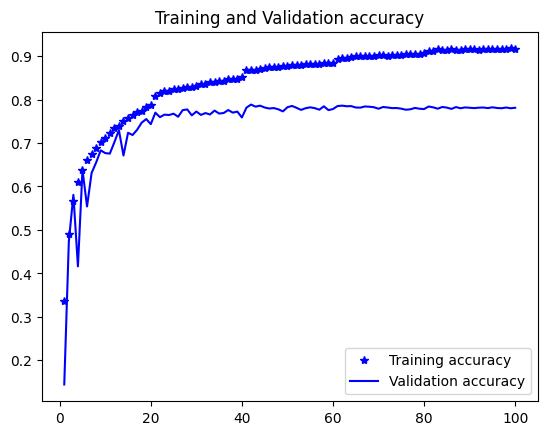

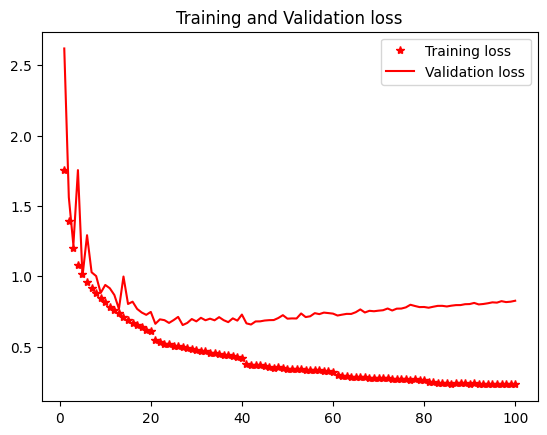

In [21]:
plot_history(history)

### Evaluate the trained model on previously unseen test data 

In [22]:
#model = tf.keras.models.load_model("./models/model_cifar.keras")

In [23]:
model.evaluate(test_images, test_labels) 

313/313 [==============================] - 2s 6ms/step - loss: 0.8681 - accuracy: 0.7724


[0.8680514693260193, 0.7724000215530396]